<a href="https://colab.research.google.com/github/abhinavgeethan/WF_Hackathon/blob/main/WF_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [152]:
# Imports
# import os
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime as dt
import math
# import tensorflow as tf
# Load compressed models from tensorflow_hub
# os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

Reading Training Data into Array

In [91]:
with open("/content/drive/MyDrive/WF_Hackathon_Datasets/training_data.csv") as f:
  train_data=np.loadtxt(f, delimiter=",",dtype=str)

print(train_data.ndim)
# train_data=np.genfromtxt("/content/drive/MyDrive/WF_Hackathon_Datasets/training_data.csv",delimiter=',',dtype=None)

2


Converting Tenor to Days

In [ ]:
def tenorToDays(T)->int:
  identifier=T[-1]
  amt=int(T[:-1])
  return amt*30 if identifier=='M' else amt*12*30

for i in range(1,train_data.shape[0]):
  tenor=tenorToDays(train_data[i][1])
  print(train_data[i][1],tenor)
  train_data[i][1]=tenor

Visualising Training Dataset

[[0.46821368 0.4192507  0.37625989 ... 0.30904518 0.3212595  0.33283149]
 [0.45847055 0.41271    0.37271656 ... 0.29865422 0.30919644 0.31925433]
 [0.41030526 0.3741893  0.34304454 ... 0.2663123  0.27283092 0.2792072 ]
 ...
 [0.27569293 0.25971082 0.24591579 ... 0.15690027 0.15451747 0.15243999]
 [0.27163743 0.25605437 0.24264835 ... 0.15686085 0.15451831 0.15245812]
 [0.26659337 0.25186475 0.23924592 ... 0.15804952 0.15562382 0.15344091]]
(13642, 19) (13642, 19) (13642, 19)


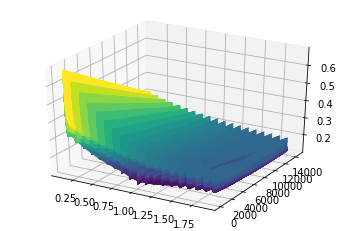

In [171]:
fig = plt.figure()
ax = plt.axes(projection='3d')
tenors=np.array([int(train_data[i][1]) for i in range(1,train_data.shape[0])])
moneyness=np.array([float(train_data[0][i]) for i in range(2,21)])
# print(tenors)
# print(moneyness)
dates=[dt.strptime(train_data[i][0],"%m/%d/%Y") for i in range(1,train_data.shape[0])]
dates=[x.timestamp() for x in dates]
dates=np.array([int(round(x)) for x in dates])
# iv=np.column_stack((train_data[1:, 2:20].astype(float),tenors))
iv=train_data[1:, 2:21].astype(float)
print(iv)
# iv=[]
# for r in train_data:
#   data_in_row=[]
#   for c in range(2,len(r)-1):
#     # print(r[c])
#     data_in_row.append(r[c])
#   iv.append(data_in_row)
# iv=np.array(iv)
# print(tenors.ndim,moneyness.ndim,iv.ndim)
# print(tenors.shape,moneyness.shape,iv.shape)
X,Y=np.meshgrid(moneyness,tenors)
print(X.shape,Y.shape,iv.shape)
ax.plot_surface(X,Y,iv,cmap="viridis")